# Determining the Ising model numerically
For a good review of what this is all about, see [Inverse statistical problems: from the inverse Ising problem to data science](https://arxiv.org/abs/1702.01522). We want to solve for the variables $\boldsymbol{h}\in\mathbb{R}^{N}$ and $\boldsymbol{J}\in\mathbb{R}^{N\times(N-1)/2}$ such that our Ising model reproduces observed averages $\langle \sigma_i \rangle^D$ and correlations $\langle \sigma_i \sigma_j \rangle ^D$. We start by taking a naïve approach, using gradient ascent on the log-likelihood function:
$$
\begin{aligned}
L_{D}(\boldsymbol{h}, \boldsymbol{J}) &=\frac{1}{M} \ln p(\mathrm{D} \mid \boldsymbol{J}, \boldsymbol{h}) \\
&=\sum_{i<j} J_{i j}\left\langle\sigma_{i} \sigma_{j}\right\rangle^{D}+\sum_{i} h_{i}\left\langle\sigma_{i}\right\rangle^{D}-\ln Z(\boldsymbol{h}, \boldsymbol{J})
\end{aligned}
$$
The partial derivatives of the log-likelihood function are:
$$
\begin{aligned}
\frac{\partial L_{D}}{\partial h_i} =& \langle \sigma_i \rangle^D - \langle \sigma_i \rangle \\
\frac{\partial L_{D}}{\partial J_{ij}} =& \langle \sigma_i \sigma_j  \rangle^D - \langle \sigma_i \sigma_j \rangle
\end{aligned}
$$
and the gradient ascent update rule is:
$$
\begin{aligned}
h_i^{(t+1)} =& h_i^{(t)} + \lambda \frac{\partial L_{D}}{\partial h_i} \\
J_{ij}^{(t+1)} =& J_{ij}^{(t)} + \lambda \frac{\partial L_{D}}{\partial J_{ij}} 
\end{aligned}
$$
where $\lambda$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MaxEnt import Ising

## Create an Ising model
We define all averages to be 0.5, and all pairwise correlations to be 0.2. Since we use the convention $\sigma \in \{0,1\}$, the auto-correlations should be 0.5 as well.

In [7]:
N = 10
avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
print(avgs,corrs, sep="\n")

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[[0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [8]:
# create the model
ising = Ising(N, avgs, corrs, lr=0.05)

### Train the model using gradient ascent
Currently, calling `gradient_ascent` performs 500 steps of gradient ascent on the ising model. 

In [9]:
import time

In [10]:
ising.lr = 0.1

In [11]:
start = time.time()
ising.gradient_ascent() # 500 steps 
stop = time.time()
print(stop-start)
print(ising.h, ising.J)

3.175230026245117
[-1.5887411  -1.71129859 -1.8091907  -1.69328329 -1.58576486 -1.86287956
 -1.62078565 -1.8314274  -1.67067025 -1.6536258 ] [[0.         0.42329502 0.42293695 0.39815445 0.37711297 0.43141049
  0.3821334  0.44608874 0.39314649 0.38504457]
 [0.         0.         0.47167455 0.44079213 0.39965612 0.46464353
  0.40365092 0.46809994 0.41850513 0.41887957]
 [0.         0.         0.         0.46166283 0.4212321  0.50087262
  0.43701369 0.50043262 0.45162095 0.44136155]
 [0.         0.         0.         0.         0.38396168 0.4606361
  0.42325525 0.45293918 0.41846879 0.43259447]
 [0.         0.         0.         0.         0.         0.46077716
  0.38976957 0.43908642 0.39259305 0.38907116]
 [0.         0.         0.         0.         0.         0.
  0.45840678 0.50508778 0.47110822 0.46534707]
 [0.         0.         0.         0.         0.         0.
  0.         0.42744192 0.41723086 0.38575191]
 [0.         0.         0.         0.         0.         0.
  0.       

### Compare predicted expectations and correlations to the actual ones

In [12]:
pred_avgs = ising.averages()
pred_corrs = ising.correlations()
print("Predicted averages:", pred_avgs, "Predicted correlations:", pred_corrs,sep="\n")

Predicted averages:
[0.46856301 0.47012803 0.47139562 0.46989876 0.46851708 0.47212487
 0.46897159 0.47170012 0.46960153 0.46937392]
Predicted correlations:
[[0.         0.20605055 0.2074466  0.20753389 0.20750321 0.2076001
  0.20762892 0.2061374  0.20756254 0.20789451]
 [0.         0.         0.20587476 0.20633828 0.20763525 0.2071493
  0.20786486 0.20645708 0.20755624 0.2072946 ]
 [0.         0.         0.         0.20630659 0.20751809 0.2061187
  0.20693778 0.20566922 0.20666771 0.20713993]
 [0.         0.         0.         0.         0.20846914 0.2071578
  0.2062503  0.20723876 0.2073066  0.20607898]
 [0.         0.         0.         0.         0.         0.20551395
  0.2070739  0.20658515 0.20757315 0.20757781]
 [0.         0.         0.         0.         0.         0.
  0.20620639 0.2061679  0.20607982 0.20622192]
 [0.         0.         0.         0.         0.         0.
  0.         0.20791565 0.20636214 0.20829872]
 [0.         0.         0.         0.         0.         0

In [13]:
# function to flatten the correlation matrix and get rid of everything below the diagonal
def flatten_corr(corr):
    N = len(corr)
    flat_corr = np.zeros(N*(N-1)//2)
    k = 0
    for i in range(N-1):
        for j in range(i+1,N):
            flat_corr[k] = corr[i,j]
            k+=1
    return flat_corr

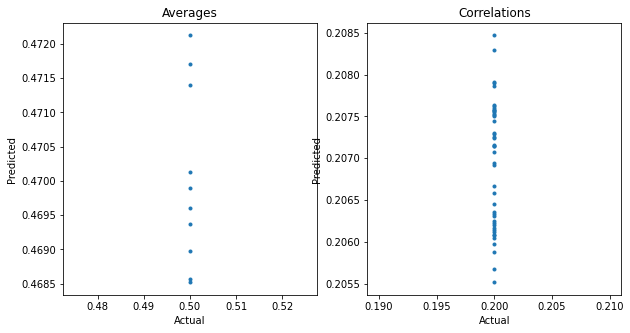

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5)) 
axes[0].plot(avgs, pred_avgs,".")
axes[0].set_title('Averages')  
axes[0].set_xlabel('Actual')  
axes[0].set_ylabel('Predicted')  
axes[1].plot(flatten_corr(corrs),flatten_corr(pred_corrs),".")
axes[1].set_title('Correlations') 
axes[1].set_xlabel('Actual')  
axes[1].set_ylabel('Predicted')  
plt.show()

## Do Ising models with the same constraints have the same parameters
I want to test whether Ising models have the same parameters if they have the same constraints, even if they have different initial paramters

In [18]:
N = 5
true_dist = Ising(N, np.zeros(N), np.zeros((N,N)), lr=0)

In [19]:
avgs = true_dist.averages()
corrs = true_dist.correlations()
print(avgs,"\n",corrs)

[0.31974454 0.24766345 0.24755745 0.26216771 0.16121494] 
 [[0.         0.0766355  0.0675858  0.06508387 0.03262103]
 [0.         0.         0.03888368 0.06875879 0.02232166]
 [0.         0.         0.         0.05394155 0.02515372]
 [0.         0.         0.         0.         0.02466001]
 [0.         0.         0.         0.         0.        ]]


In [20]:
ising = Ising(N, avgs, corrs, lr=0.05)
ising.pert_init()

True

In [41]:
start = time.time()
ising.gradient_ascent() # 500 steps 
stop = time.time()
print(stop-start)

0.1526191234588623


In [42]:
pred_avgs = ising.averages()
pred_corrs = ising.correlations()
print("Predicted averages:", pred_avgs, "Predicted correlations:", pred_corrs,sep="\n")

Predicted averages:
[0.31949249 0.24737594 0.24724948 0.26189093 0.16074459]
Predicted correlations:
[[0.         0.07687329 0.06785175 0.06529243 0.03309726]
 [0.         0.         0.03916756 0.06901698 0.02288135]
 [0.         0.         0.         0.05422653 0.02579499]
 [0.         0.         0.         0.         0.0252067 ]
 [0.         0.         0.         0.         0.        ]]


In [43]:
def plot_y_x(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.5, zorder=0) # zorder puts the line at the back
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

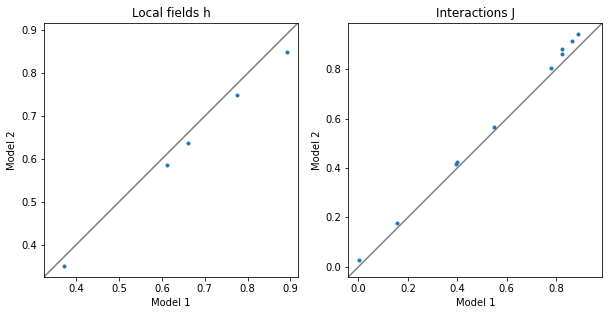

In [44]:
fig, axes = plt.subplots(1,2,figsize=(10,5)) 
axes[0].plot(ising.h, true_dist.h,".")
axes[0].set_title('Local fields h')  
axes[0].set_xlabel('Model 1')  
axes[0].set_ylabel('Model 2')  
plot_y_x(axes[0])
axes[1].plot(flatten_corr(ising.J),flatten_corr(true_dist.J),".")
axes[1].set_title('Interactions J') 
axes[1].set_xlabel('Model 1')  
axes[1].set_ylabel('Model 2')  
plot_y_x(axes[1])
plt.show()

## Are the local fields in a pairwise model the same as the local fields in an independent model?
Naively, one might assume the pairwise model has the same local fields as the independent model, and the interaction parameters correct for the discrepencies of the independent model. We show that they in fact have different local fields. 

In [326]:
from MaxEnt import Independent

In [327]:
ind = Independent(N, avgs)

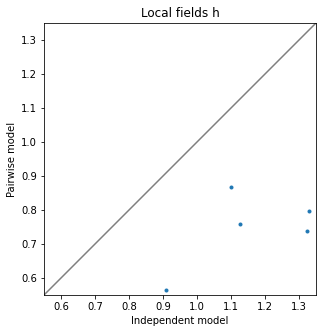

In [329]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(ind.h, true_dist.h,".")
ax.set_title('Local fields h')  
ax.set_xlabel('Independent model')  
ax.set_ylabel('Pairwise model')  
plot_y_x(ax)

## Exploring concavity of the Lagrangian
If we find the parameters such that our pairwise model reproduces the desired correlations, are we at a maximum of the Lagrangian?
We start by investigating frustration in a toy situation where 3 cells have opposing interaction parameters and look at whether we can find multiple low energy states.

In [13]:
#      A
#    -   -
#   B  +  C
J_ab = -1
J_ac = 1
J_bc = -1

def sum_interactions(a,b,c):
    return J_ab*a*b + J_ac*a*c + J_bc*b*c

s = [0,1]

for a in s:
    for b in s:
        for c in s:
            print(a,b,c,"|",sum_interactions(a,b,c))

0 0 0 | 0
0 0 1 | 0
0 1 0 | 0
0 1 1 | -1
1 0 0 | 0
1 0 1 | 1
1 1 0 | -1
1 1 1 | -1
